In [55]:
from truckscenes import TruckScenes
import os
import matplotlib.pyplot as plt
import numpy as np

cwd = os.getcwd()
dataset_path  = os.path.join(cwd, './data/man-truckscenes' )
print(f"Dataset path: {dataset_path}")

trucksc = TruckScenes('v1.0-mini', dataset_path, True)

Dataset path: c:\Users\siani\.vscode\TechnologiesForAutonomousVehicles\TrajectoryPrediction\./data/man-truckscenes
Loading truckscenes tables for version v1.0-mini...
11 attribute,
18 calibrated_sensor,
27 category,
20090 ego_motion_cabin,
20089 ego_motion_chassis,
20116 ego_pose,
1094 instance,
400 sample,
25750 sample_annotation,
43556 sample_data,
10 scene,
18 sensor,
4 visibility,
Done loading in 0.914 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


In [104]:
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

def plot_trajectories(instance_token):
    """
    Traccia la traiettoria di un'istanza nel sistema di riferimento dell'ego vehicle.
    
    Parametri:
    - instance_token: token dell'istanza da tracciare.
    """
    my_instance = trucksc.get('instance', instance_token)
    first_annotation_token = my_instance['first_annotation_token']
    last_annotation_token = my_instance['last_annotation_token']

    annotation_token = first_annotation_token
    relative_positions = []
    ego_positions = []

    while True:
        annotation = trucksc.get('sample_annotation', annotation_token)
        sample_token = annotation['sample_token']
        sample = trucksc.get('sample', sample_token)

        # Ego position and rotation
        ego_pose = trucksc.getclosest('ego_pose', sample['timestamp'])
        ego_translation = ego_pose['translation']
        ego_rotation = ego_pose['rotation']  # quaternion [w, x, y, z]

        # Quaternion representation for scipy
        q = [ego_rotation[1], ego_rotation[2], ego_rotation[3], ego_rotation[0]]
        ego_rot_inv = R.from_quat(q).inv()

        # Coordinate dell'oggetto (istanza) nel mondo
        instance_translation = annotation['translation']

        # Traslazione relativa (coordinate mondo)
        rel_translation = [instance_translation[i] - ego_translation[i] for i in range(3)]

        # Rotazione inversa per portare nel frame dell’ego vehicle
        rel_in_ego = ego_rot_inv.apply(rel_translation)

        # Salva solo x e y (piano orizzontale)
        relative_positions.append((rel_in_ego[0], rel_in_ego[1]))
        ego_positions.append((0.0, 0.0))  # ego è sempre all'origine nel suo sistema

        if annotation_token == last_annotation_token:
            break
        annotation_token = annotation['next']

    # Estrai coordinate per il grafico
    x_rel, y_rel = zip(*relative_positions)
    x_ego, y_ego = zip(*ego_positions)

    # Plot
    plt.plot(x_rel, y_rel, label="Traiettoria nel frame dell'ego", color='blue')
    plt.scatter(x_rel[0], y_rel[0], color='green', label='Inizio')
    plt.scatter(x_rel[-1], y_rel[-1], color='orange', label='Fine')
    # ego position with a red cross
    plt.scatter(x_ego[0], y_ego[0], color='red', marker='x', label='Posizione Ego')
    plt.title('Traiettoria oggetto nel sistema di riferimento dell\'ego vehicle')
    plt.xlabel('x (m) - frame ego')
    plt.ylabel('y (m) - frame ego')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


## First instance

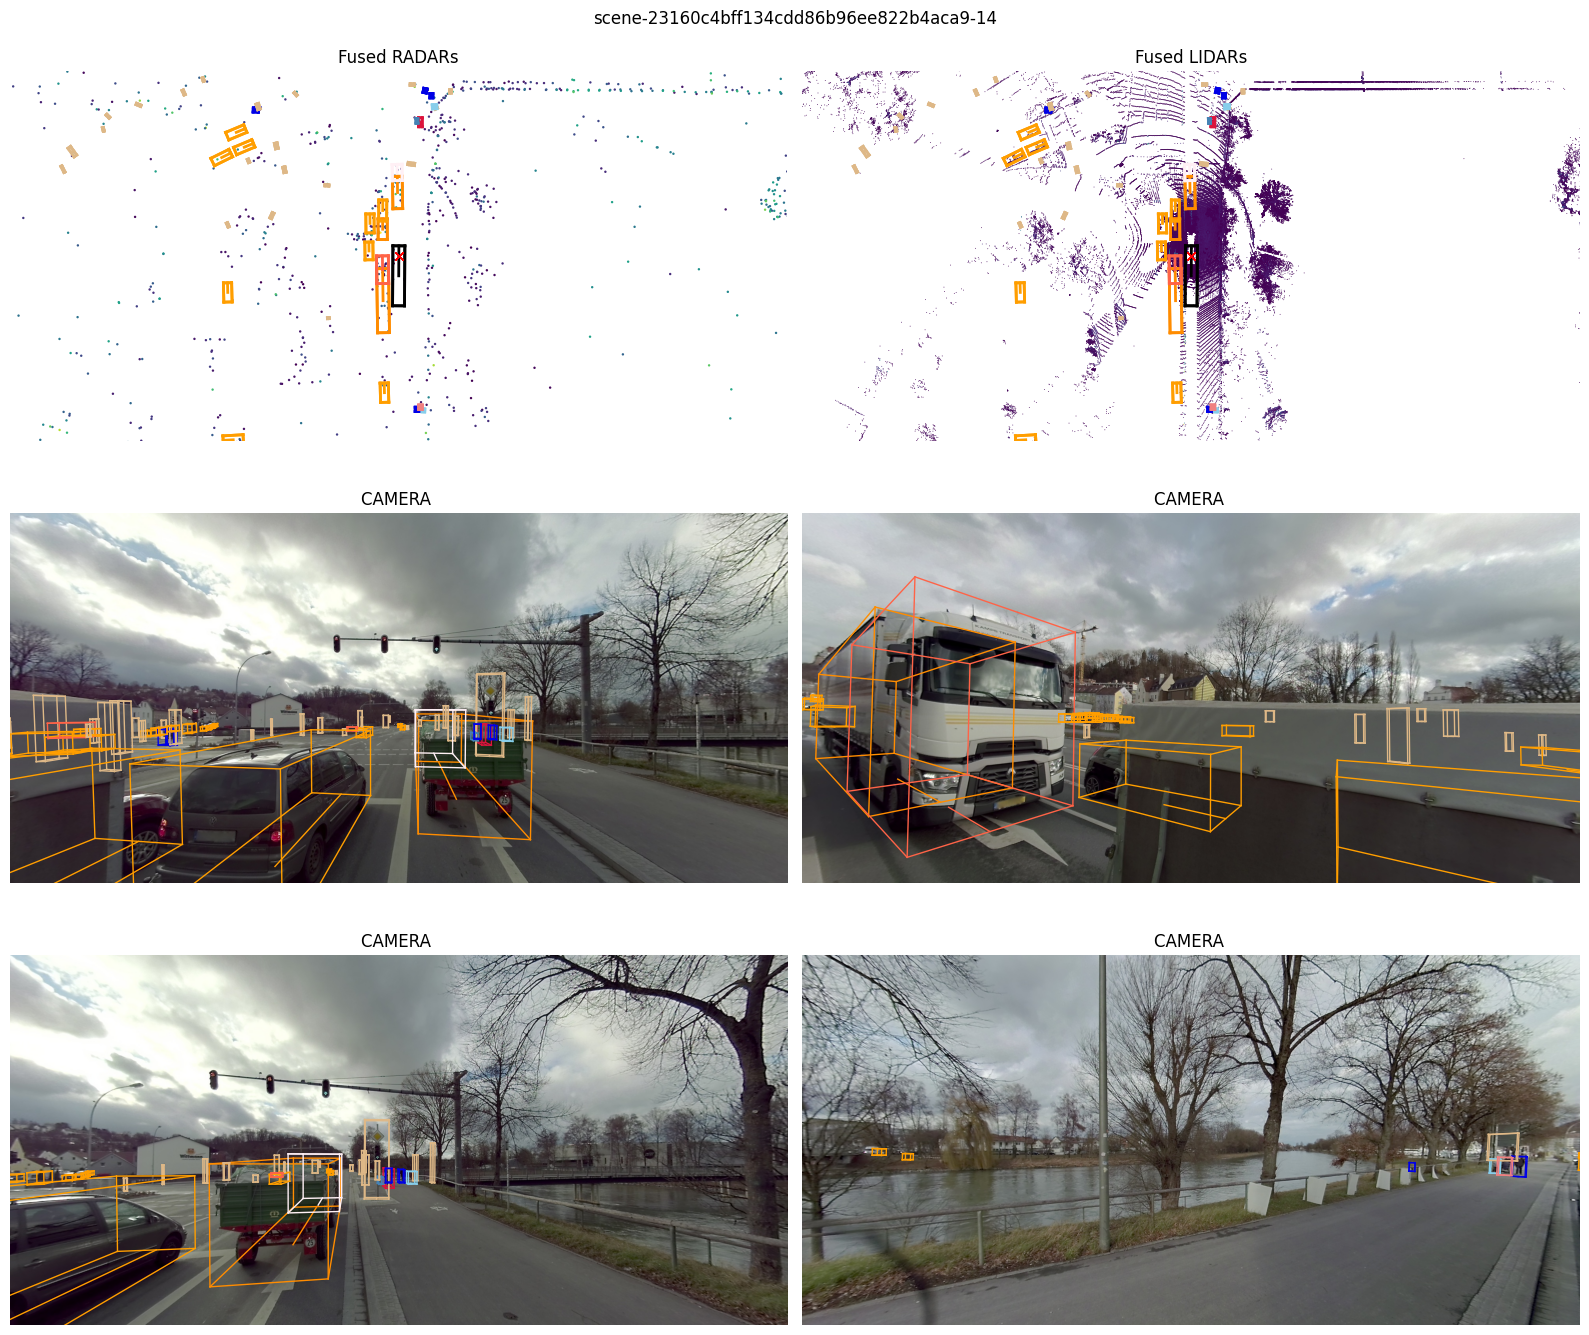

In [93]:
scene = my_scene = trucksc.scene[2]
scene_token = scene['token']
first_sample_token = my_scene['first_sample_token']
trucksc.render_sample(first_sample_token)

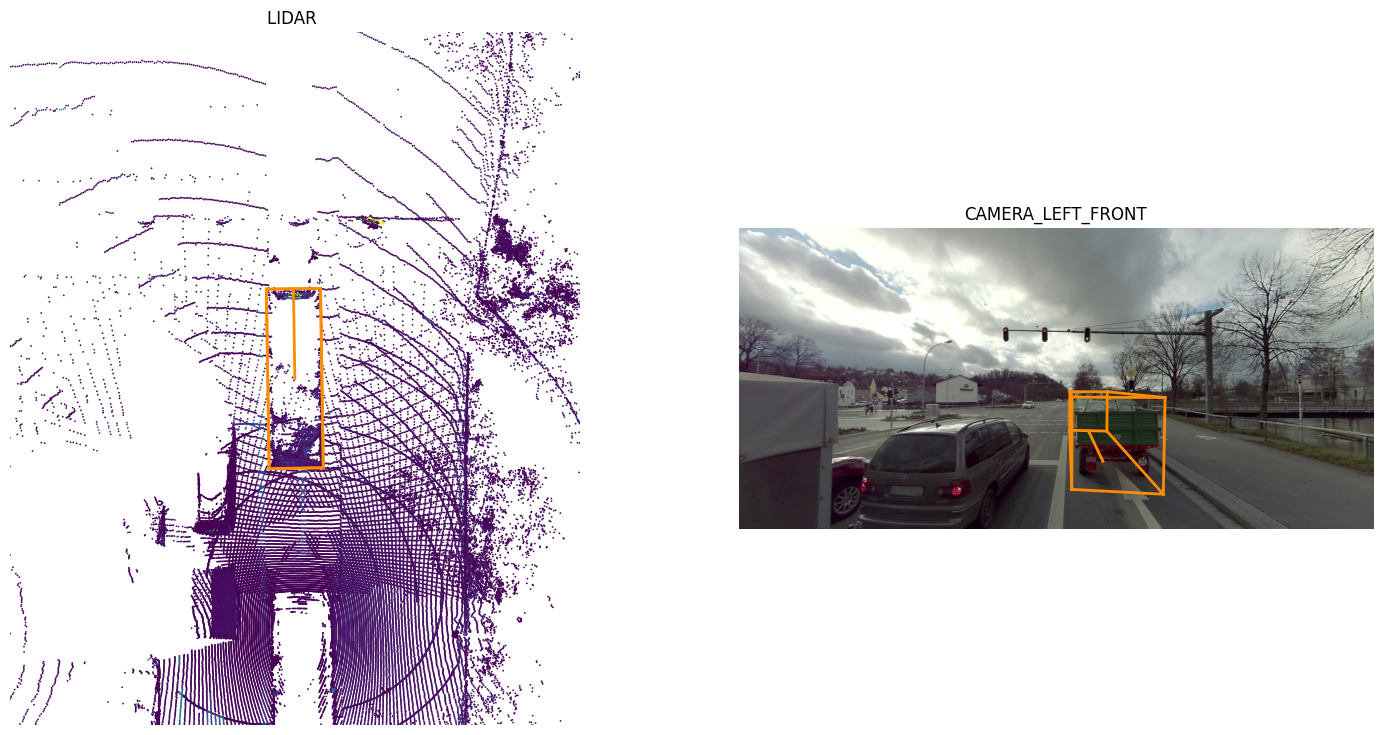

In [94]:
my_sample = trucksc.get('sample', first_sample_token)
my_annotation_token = my_sample['anns'][0]
my_annotation_metadata =  trucksc.get('sample_annotation', my_annotation_token)
trucksc.render_annotation(my_annotation_token)

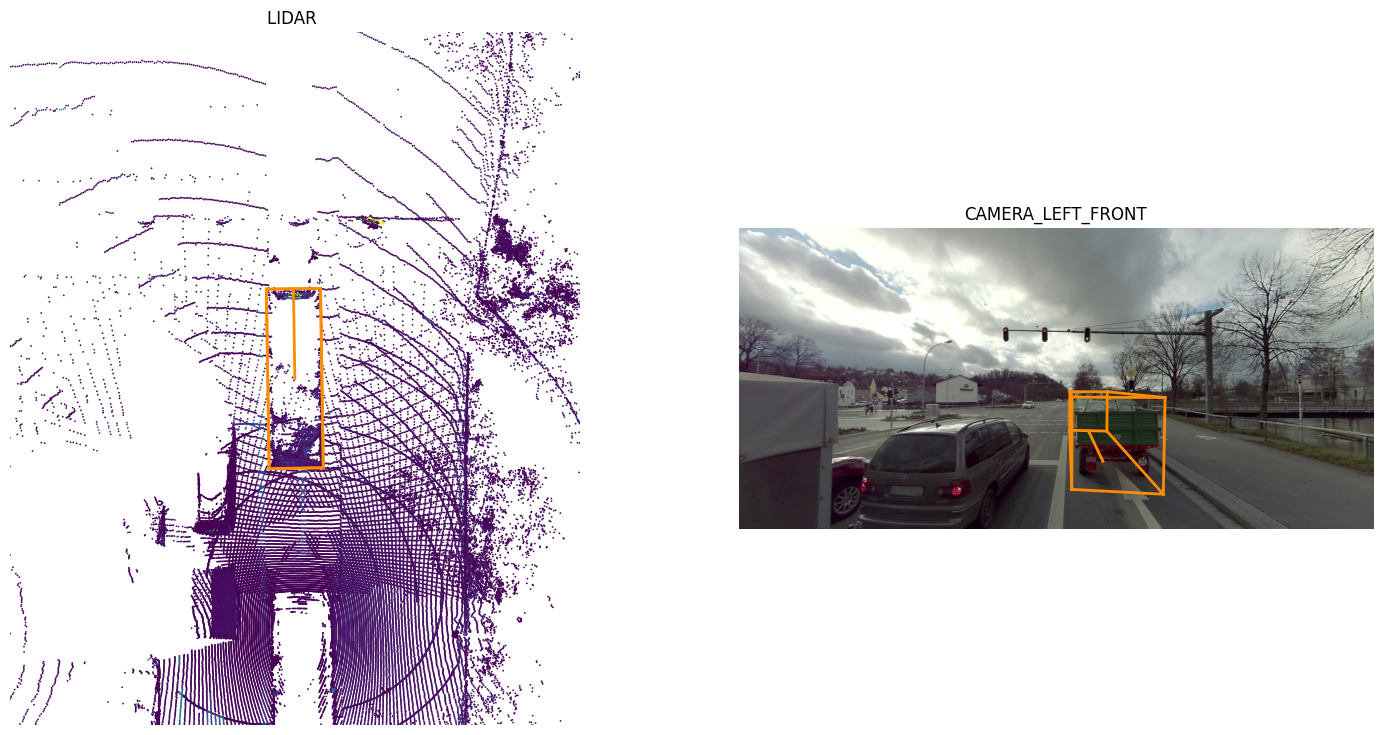

In [106]:
my_instance = trucksc.get('instance', my_annotation_metadata['instance_token'])
instance_token = my_instance['token']
trucksc.render_instance(instance_token)

In [70]:
trucksc.render_scene_channel(scene_token, 'CAMERA_LEFT_FRONT')

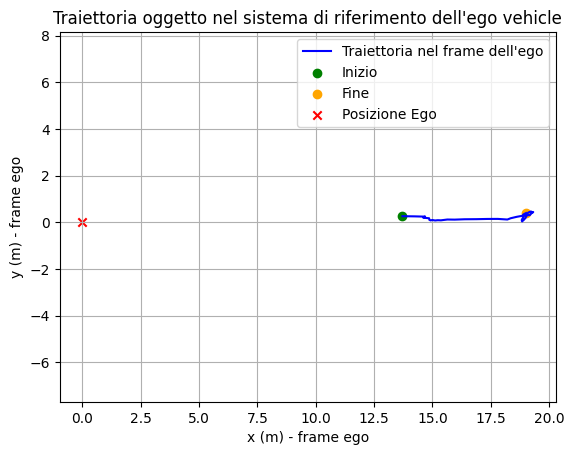

In [107]:
plot_trajectories(instance_token)

## Second instance

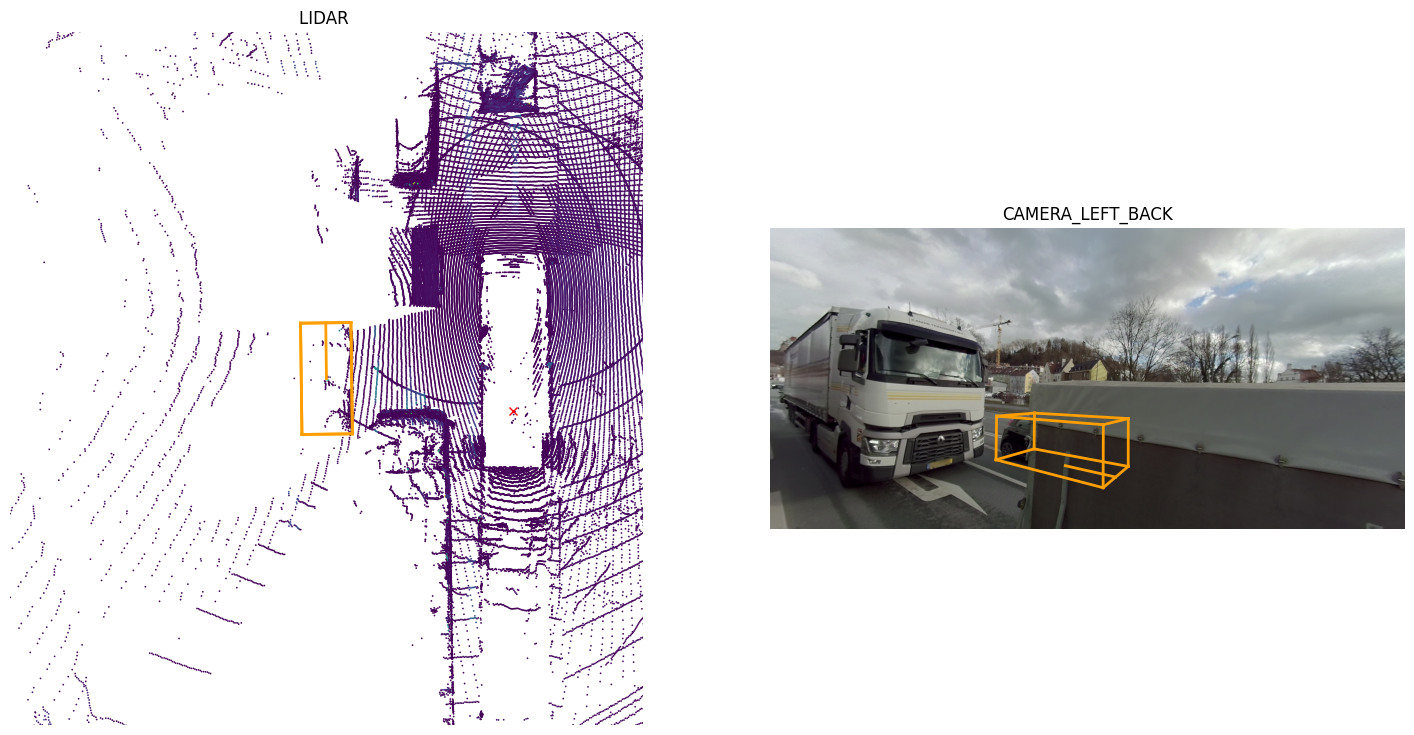

In [115]:
my_annotation_token = my_sample['anns'][2]
my_annotation_metadata =  trucksc.get('sample_annotation', my_annotation_token)
trucksc.render_annotation(my_annotation_token)

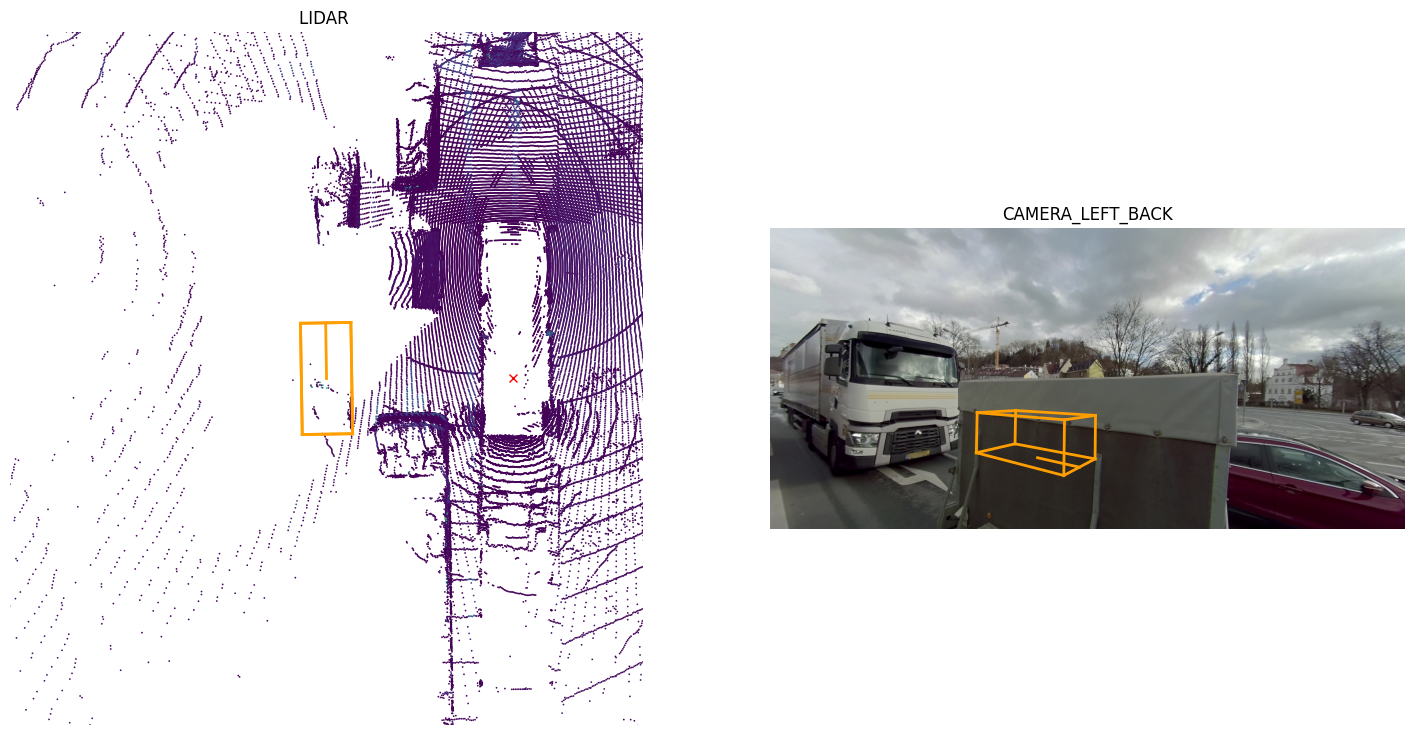

In [116]:
my_instance = trucksc.get('instance', my_annotation_metadata['instance_token'])
instance_token = my_instance['token']
trucksc.render_instance(instance_token)

In [92]:
trucksc.render_scene_channel(scene_token, 'CAMERA_LEFT_BACK')

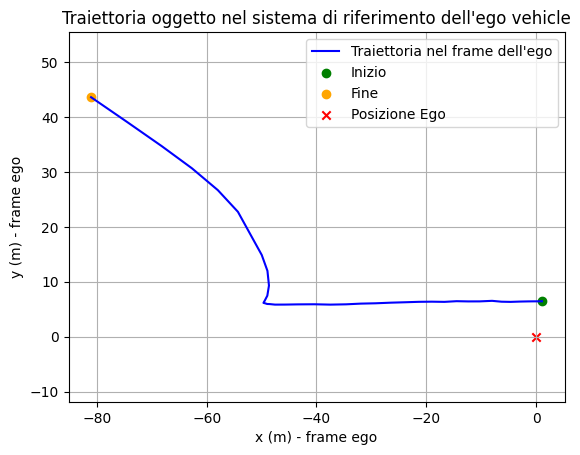

In [114]:
plot_trajectories(instance_token)

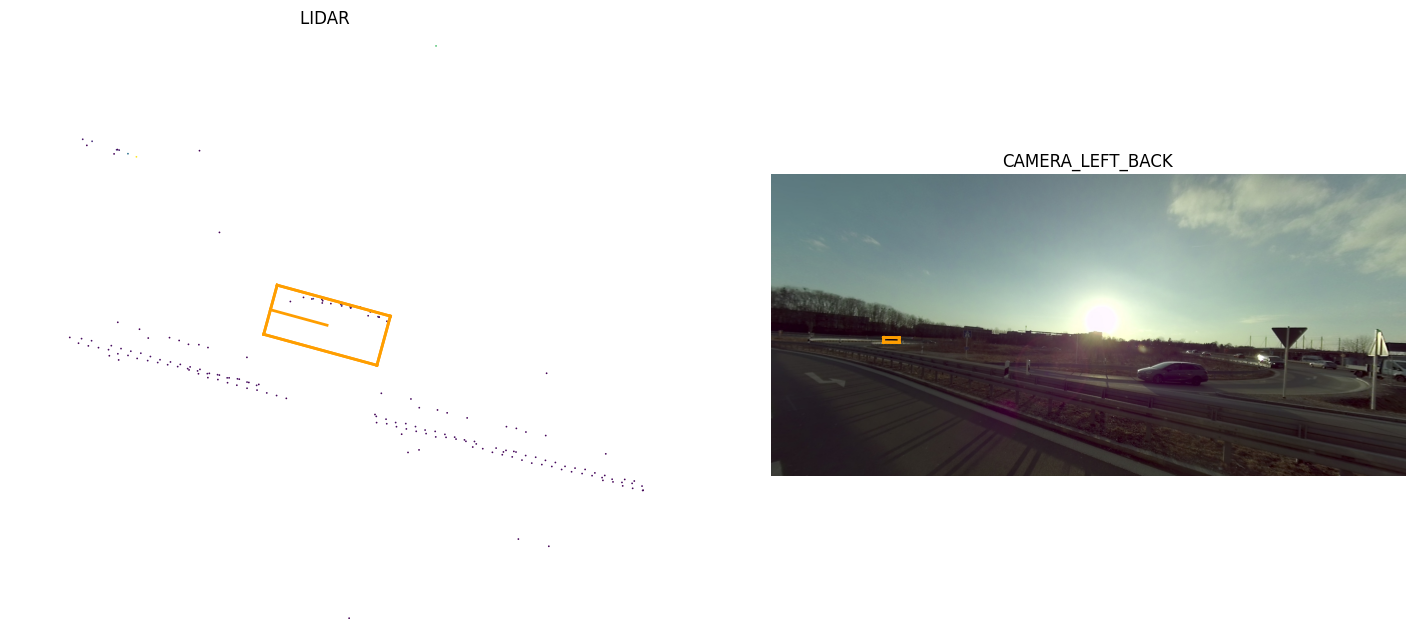

In [117]:
trucksc.render_instance('f28a78f31a6f4ebe86dffe2dbbdcec92')